In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn .model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics


Matplotlib is building the font cache; this may take a moment.


data collection and processing

In [5]:
#loding dataset
gold_data=pd.read_csv("/Users/ishansingh/vs codes /python/gold_price_prediction/gld_price_data.csv")

In [6]:
gold_data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [8]:
gold_data.info()
gold_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


correlation:
1.positive correlation
2.negative correlation

In [11]:
correlation = gold_data.drop(columns=['Date']).corr()


<Axes: >

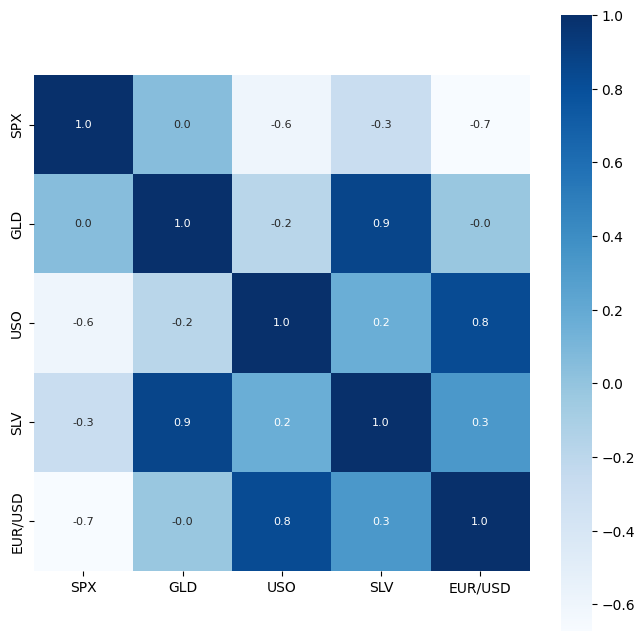

In [13]:
#constructing heatmap to understand the correaltion
plt.figure(figsize=(8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.1f',annot=True,annot_kws={'size':8},cmap='Blues')

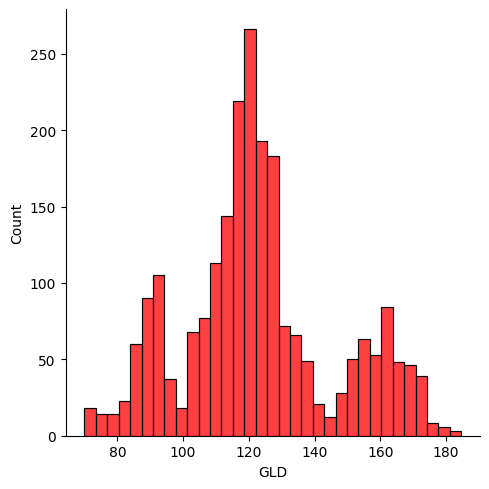

In [14]:
#checking gld price disribtion
sns.displot(gold_data['GLD'],color='Red') 

splitting the features and target 

In [17]:
X=gold_data.drop(['Date','GLD'],axis=1)
Y=gold_data['GLD']
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [18]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [20]:
#spliting data 
X_train,X_test,Y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

Model training using random forest regressor

In [21]:
regressor=RandomForestRegressor(n_estimators=100)

In [ ]:
#training the model 
regressor.fit(X_train,Y_train)


RandomForestRegressor()

In [24]:
#testing the model
test_data_prediction=regressor.predict(X_test)
print(X_test)

              SPX        USO        SLV   EUR/USD
903   1351.949951  38.330002  32.900002  1.324854
129   1271.510010  93.900002  13.450000  1.472581
1787  1880.050049   8.910000  14.340000  1.119996
1913  2181.300049  10.960000  18.620001  1.127142
2048  2352.949951  10.680000  17.320000  1.067247
...           ...        ...        ...       ...
923   1370.869995  41.090000  33.220001  1.327492
1693  1952.290039  14.930000  13.990000  1.129089
2054  2349.010010  11.060000  17.430000  1.064453
658   1273.849976  37.680000  28.420000  1.315686
376   1057.579956  35.959999  17.250000  1.478131

[458 rows x 4 columns]


In [25]:
#r squared error
error_score=metrics.r2_score(y_test,test_data_prediction)
print("r squared error:", error_score)

r squared error: 0.989293565299561


Comparing actual and predicted values

In [26]:
y_test=list(y_test)

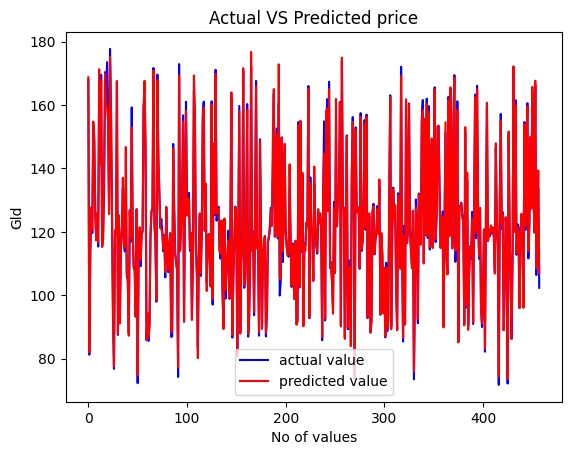

In [27]:
plt.plot(y_test,color='Blue',label="actual value")
plt.plot(test_data_prediction,color='red',label="predicted value")
plt.title("Actual VS Predicted price")
plt.xlabel("No of values")
plt.ylabel("Gld")
plt.legend()
plt.show()